In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

Load Titanic dataset

In [3]:
df = pd.read_csv("Titanic.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.shape

(891, 12)

In [5]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Identifying null values:

In [7]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<AxesSubplot:>

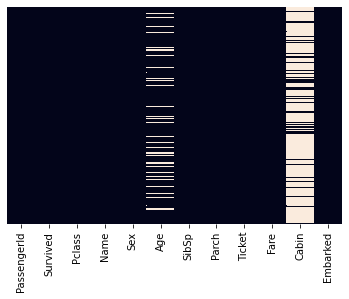

In [8]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False)

Handling Missing values:

In [9]:
mode = df['Embarked'].mode()
mode[0]

df['Embarked'].fillna(mode[0], inplace = True)

In [10]:
df['Embarked'].isnull().sum()

0

In [11]:
df['Age'].fillna(df['Age'].median(), inplace = True)

In [12]:
df['Age'].isnull().sum()

0

In [13]:
df['Cabin'].fillna('Missing', inplace = True)

In [15]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

Handling Categorical features:

In [16]:
df['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

In [24]:
df["Embarked"] = df['Embarked'].map({'S':0 , 'C':1 ,'Q':2})

In [25]:
df.Cabin.unique()

array(['Missing', 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62

In [26]:
df['Cabin'] = df['Cabin'].astype(str).str[0]

In [27]:
df.Cabin.unique()

array(['M', 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

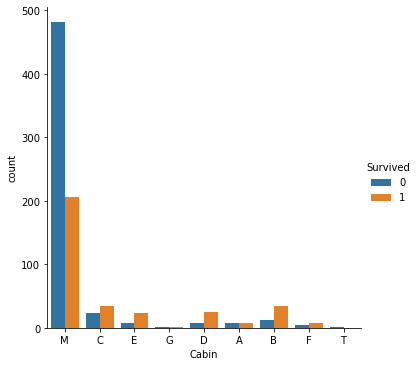

In [29]:
sns.catplot(x ="Cabin", hue ="Survived",
kind ="count", data = df)

In [30]:
df.groupby(['Cabin'])['Survived'].mean().sort_values().index

Index(['T', 'M', 'A', 'G', 'C', 'F', 'B', 'E', 'D'], dtype='object', name='Cabin')

In [31]:
ordered_values = df.groupby(['Cabin'])['Survived'].mean().sort_values().index
enumerate(ordered_values, 0)

In [32]:
ordered_values_dict = { k: i for i , k in enumerate(ordered_values, 0)}

In [33]:
df['Cabin_new'] = df['Cabin'].map(ordered_values_dict)

In [34]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin_new
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,M,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,1,4
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,M,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C,0,4
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,M,0,1


Feature Selection: 

Droping Name, Cabin, PassengerId as they are not related. 

In [78]:
df.drop(['Name'], axis = 1, inplace = True)

In [77]:
df.drop(['Cabin'], axis = 1, inplace = True)

In [75]:
df.drop(['Ticket'], axis = 1, inplace = True)

In [76]:
df.drop(['PassengerId'], axis = 1, inplace = True)

In [42]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin_new
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,M,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,1,4
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,M,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C,0,4
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,M,0,1


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    object 
 11  Embarked     891 non-null    int64  
 12  Cabin_new    891 non-null    int64  
dtypes: float64(2), int64(7), object(4)
memory usage: 90.6+ KB


In [44]:
print('skewness value of Age: ',df['Age'].skew())
print('skewness value of Fare: ',df['Fare'].skew())

skewness value of Age:  0.5102446555756495
skewness value of Fare:  4.787316519674893


<AxesSubplot:>

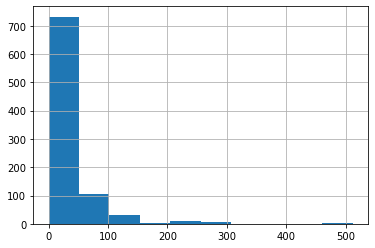

In [45]:
df['Fare'].hist()

C:\Anacoda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Fare'>

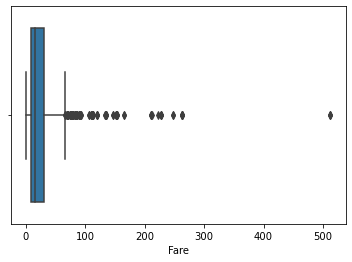

In [46]:
sns.boxplot('Fare',data=df)

C:\Anacoda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age'>

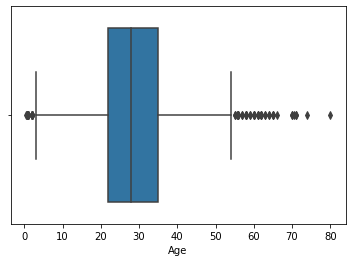

In [47]:
sns.boxplot('Age',data=df)

<AxesSubplot:>

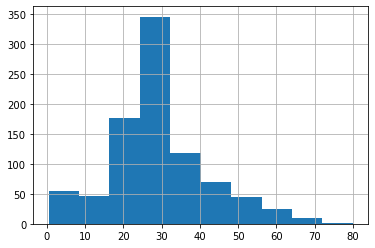

In [56]:
df['Age'].hist()

In [57]:
#Fare has more outliers and data is skewed. 

In [67]:
def detect_outlier(df,variable):
    q1 = df[variable].quantile(0.25)
    q3 = df[variable].quantile(0.75)
    IQR = q3-q1
    lower_bound = q1 - (1.5*IQR)
    upper_bound = q3 + (1.5*IQR)
    df[variable] = np.where(df[variable]<lower_bound, q1, np.where(df[variable]>upper_bound,upper_bound,df[variable]))

In [68]:
variable = 'Fare'
detect_outlier(df,variable)

<AxesSubplot:>

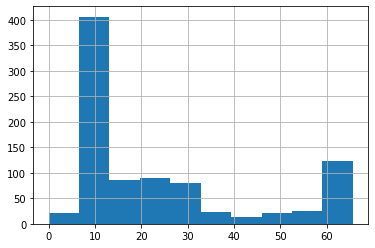

In [69]:
df['Fare'].hist()

C:\Anacoda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Fare'>

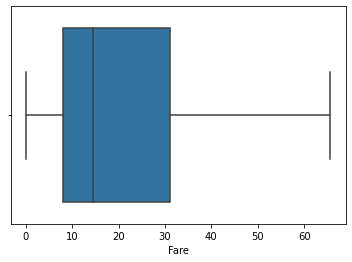

In [70]:
sns.boxplot('Fare',data=df)

In [71]:
detect_outlier(df,'Age')

C:\Anacoda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age'>

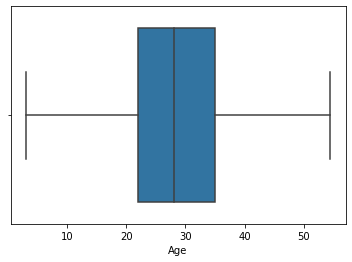

In [72]:
sns.boxplot('Age',data=df)

In [79]:
df.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked', 'Cabin_new'],
      dtype='object')

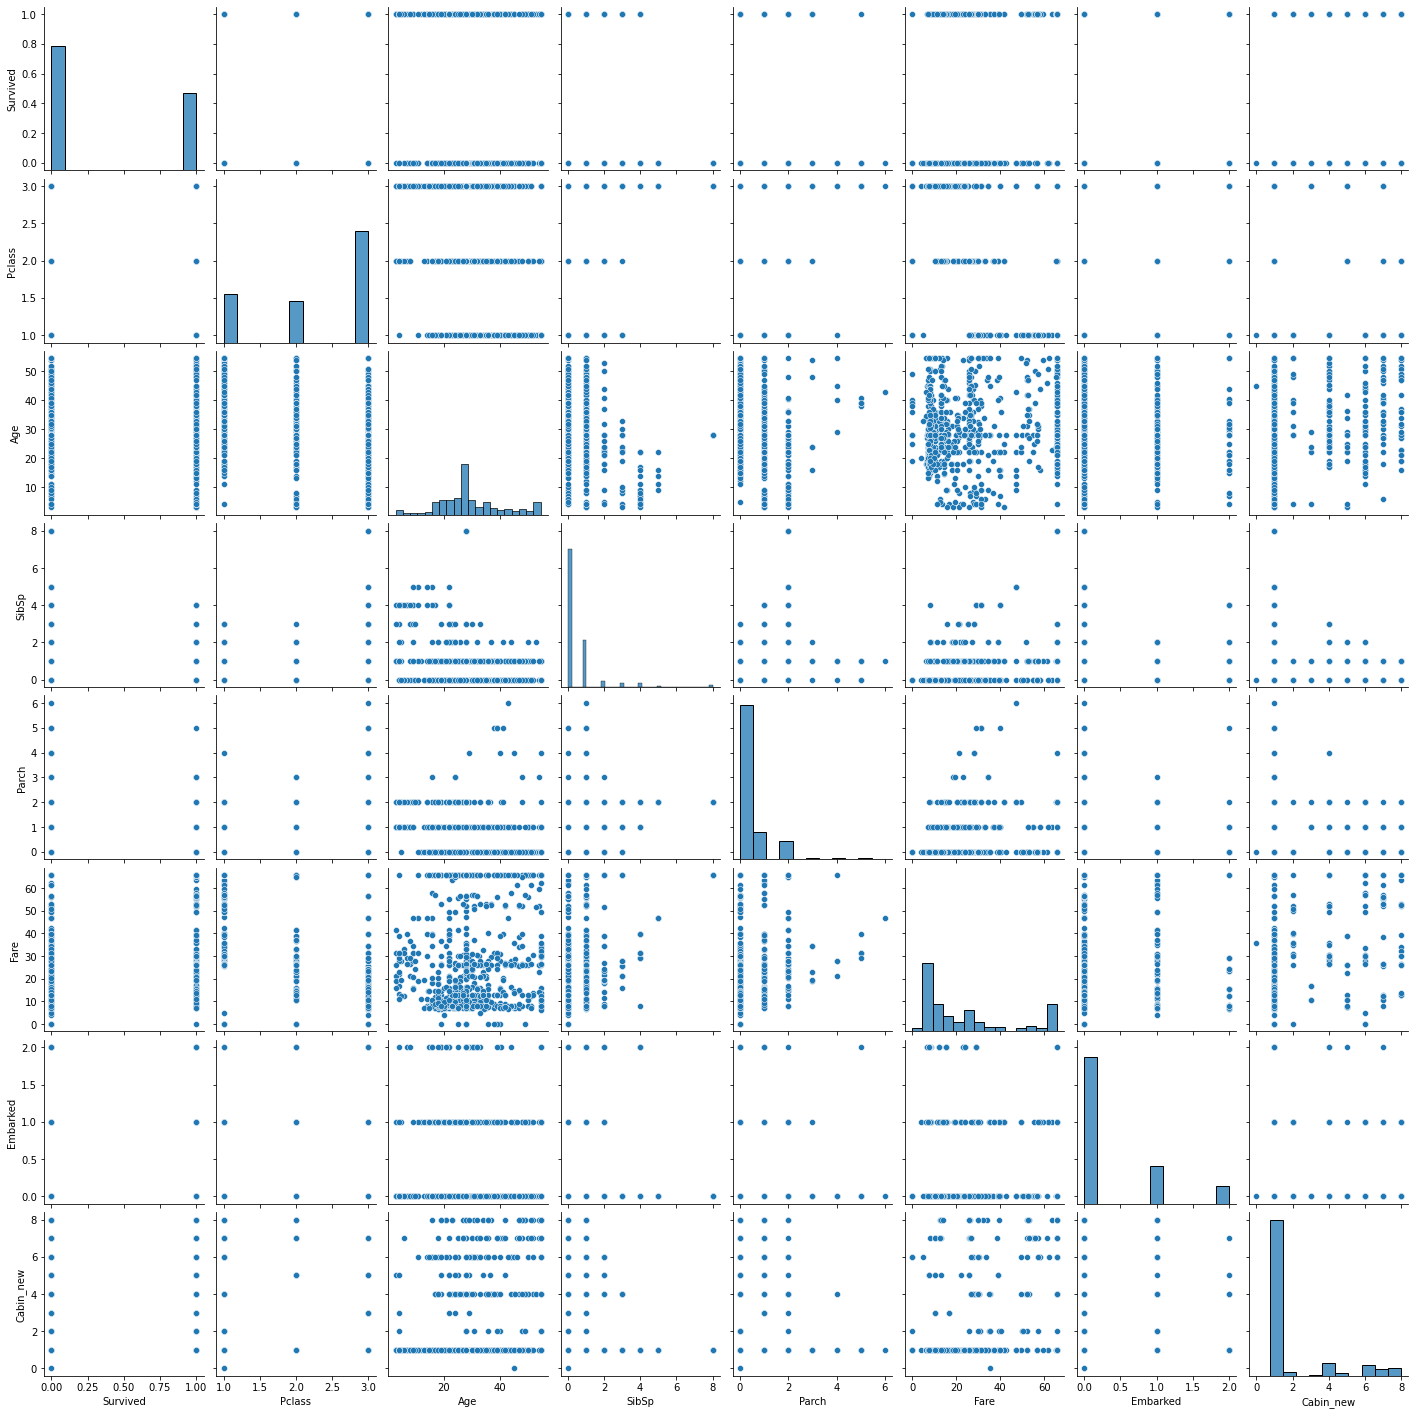

In [82]:
#Visualizations:
sns.pairplot(df)

<AxesSubplot:xlabel='Sex', ylabel='Count'>

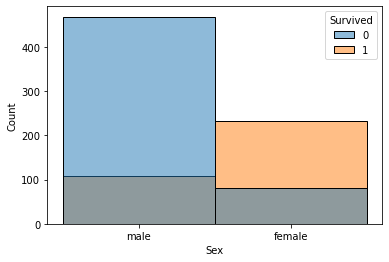

In [93]:
sns.histplot(data = df , x = 'Sex', hue='Survived')

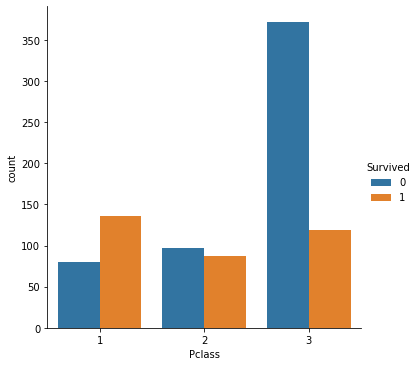

In [96]:
sns.catplot(x ="Pclass", hue ="Survived",
kind ="count", data = df)

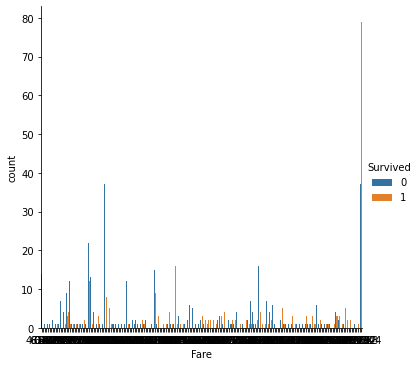

In [97]:
sns.catplot(x ="Fare", hue ="Survived",
kind ="count", data = df)

<AxesSubplot:xlabel='Fare', ylabel='Count'>

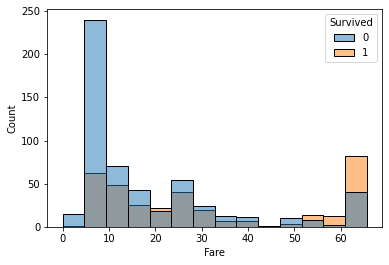

In [101]:
sns.histplot(data=df, x = 'Fare', hue = 'Survived')

<AxesSubplot:xlabel='Age', ylabel='Count'>

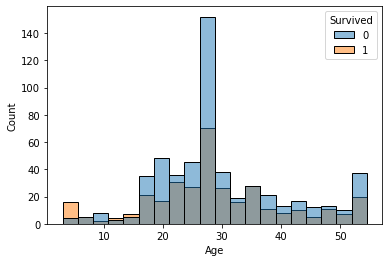

In [103]:
sns.histplot(data=df, x = 'Age', hue = 'Survived')

Observations: 

1. Survived count is less.
2. survived count is more for Women, children and Pclass 1. 

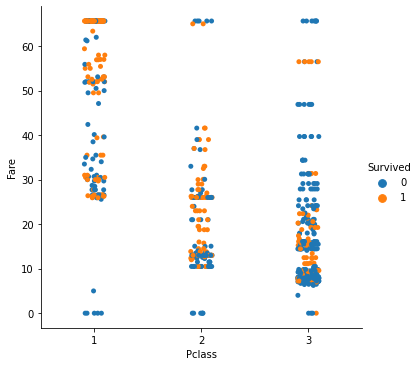

In [107]:
sns.catplot(x ="Pclass", y = 'Fare', hue ="Survived", data = df)